# Experimental data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

import os
import datetime
from collections import namedtuple


DATA_DIR = os.path.join("data_raw", "240119_temperaturetest_C6B2")
TEMP_IMG_DIR = os.path.join("img_raw")
IMG_DIR = os.path.join("img_raw")
SAVE_FMT = "pdf"
SAVEFIG_PARAMS = {"dpi": 1000, "bbox_inches": "tight"}

plt.style.use("tableau-colorblind10")
# plt.rc("text", usetex=True)
# plt.rc("font", family="serif")

## Data reading

In [10]:
DATA_CHAMBER_FILENAME = os.path.join(DATA_DIR, "chamber.csv")
DATA_SENSOR_FILENAME = os.path.join(DATA_DIR, "test.csv")
DATA_EIS_FILENAME = os.path.join(DATA_DIR, "EIS_C6B2_temperaturetest_240119")
DATA_CAPACITY_FILENAME = os.path.join(DATA_DIR, "TestData.csv")
DATA_PROCEDURE_FILENAME = os.path.join(DATA_DIR, "TestProcedure.csv")

chamber_df = pd.read_csv(DATA_CHAMBER_FILENAME).drop(["Unnamed: 8"], axis=1, inplace=False)
sensor_df = pd.read_csv(DATA_SENSOR_FILENAME)
eis_df = pd.read_csv(DATA_EIS_FILENAME)
cap_df = pd.read_csv(
    DATA_CAPACITY_FILENAME,
    skiprows=[106272, 212757],
    header=0,
    names=["Current", "Voltage", "Capacity", "Cumulative_capacity", "Seconds", "Test_State", "SOC"],
)
# proc_df = pd.read_csv(DATA_PROCEDURE_FILENAME)

display(chamber_df)
display(sensor_df)
display(eis_df)
display(cap_df)
# display(proc_df)

,DateTime,CSZ System,TEMPERATURE PV,TEMPERATURE SP,TEMPERATURE %Out,PRODUCT PV,PRODUCT SP,PRODUCT %Out
0,1/19/2024 10:02:57,NaN,26.4,23.0,0.00,0.0,0.0,0.0
1,1/19/2024 10:03:03,NaN,26.4,23.0,16.62,25.3,23.0,0.0
2,1/19/2024 10:03:09,NaN,26.3,23.0,14.23,25.3,23.0,0.0
3,1/19/2024 10:03:15,NaN,26.3,23.0,10.51,25.3,23.0,0.0
4,1/19/2024 10:03:21,NaN,26.4,23.0,1.00,25.3,23.0,0.0
...,...,...,...,...,...,...,...,...
63541,1/23/2024 19:57:10,NaN,22.8,23.0,12.95,23.3,23.0,0.0
63542,1/23/2024 19:57:16,NaN,22.8,23.0,4.40,23.3,23.0,0.0
63543,1/23/2024 19:57:22,NaN,22.7,23.0,4.98,23.4,23.0,0.0
63544,1/23/2024 19:57:28,NaN,22.8,23.0,-3.31,23.5,23.0,0.0


,timestamp_utc,unix_time_utc,cell,res_s1,temp_s1,res_s2,temp_s2,res_a1,temp_a1,res_a2,temp_a2
0,2024-01-19 17:58:57.126194+00:00,1705687137,0,93750.01,26,90148.70,27,94857.14,26,98255.82,25
1,2024-01-19 17:58:58.169661+00:00,1705687138,0,99415.21,25,90148.70,27,95229.02,26,99027.25,25
2,2024-01-19 17:58:59.214335+00:00,1705687139,0,92293.24,27,89795.93,27,100982.32,25,98640.77,25
3,2024-01-19 17:59:00.259535+00:00,1705687140,0,92293.24,27,88397.80,28,95602.30,26,99027.25,25
4,2024-01-19 17:59:01.305118+00:00,1705687141,0,92655.38,27,89795.93,27,99804.69,25,94117.65,26
...,...,...,...,...,...,...,...,...,...,...,...
347665,2024-01-23 22:54:46.895912+00:00,1706050486,0,101377.96,25,99027.25,25,105010.03,24,113569.93,22
347666,2024-01-23 22:54:47.941299+00:00,1706050487,0,103379.72,24,99415.21,25,104600.00,24,105010.03,24
347667,2024-01-23 22:54:48.986086+00:00,1706050488,0,103379.72,24,100195.70,25,105010.03,24,107926.82,23
347668,2024-01-23 22:54:50.030603+00:00,1706050490,0,100982.32,25,101377.96,25,105010.03,24,108775.50,23


,Index,Frequency (Hz),Z' (Ω),-Z'' (Ω),Z (Ω),-Phase (°),Time (s)
0,1,5000,0.227170118772829,-0.0772546989029067,0.239946976154817,-18.7818445172943,377.813066046114
1,2,3971.6,0.226025644045214,-0.0612493296627196,0.234177437320904,-15.1621095581762,379.193089042629
2,3,3154.8,0.225362692422953,-0.048439685300182,0.230509753043344,-12.1306497250347,380.383113039625
3,4,2505.9,0.224967860790046,-0.0381703830181754,0.228183076778721,-9.62968909830531,381.59313603657
4,5,1990.5,0.224675924727147,-0.0299166506050472,0.226658944529933,-7.58458578342952,382.79315703354
...,...,...,...,...,...,...,...
3270,47,0.12559,0.274421661553218,0.0126113184452417,0.274711291509024,2.63123282208488,87492.4265931029
3271,48,0.099763,0.274148345951401,0.0119034012281316,0.274406644505352,2.48619608746466,87502.5667800772
3272,49,0.079245,0.276330140323289,0.011654473154601,0.276575800090318,2.41506992853518,87514.7670040465
3273,50,0.062946,0.279430147983522,0.0136556236257681,0.279763621042303,2.79779271638302,87529.5422810092


,Current,Voltage,Capacity,Cumulative_capacity,Seconds,Test_State,SOC
0,-2.24786,3.03875,0.000000,0.00000,01/19/2024 16:35:53.833212060,1,-1.00000
1,-2.24787,3.00576,-0.676590,-0.67659,01/19/2024 16:35:54.916781840,1,-1.03300
2,-2.24787,2.99862,-0.676563,-1.35315,01/19/2024 16:35:56.000307080,1,-1.06601
3,-2.24787,2.99295,-0.676570,-2.02972,01/19/2024 16:35:57.083843660,1,-1.09901
4,-2.24787,2.98796,-0.676569,-2.70629,01/19/2024 16:35:58.167377260,1,-1.13201
...,...,...,...,...,...,...,...
302263,1.49998,3.98399,0.451590,623.95500,01/23/2024 19:38:16.972537460,3,30.43690
302264,1.49998,3.98406,0.451449,624.40700,01/23/2024 19:38:18.056031000,3,30.45890
302265,1.49998,3.98413,0.451445,624.85800,01/23/2024 19:38:19.139515500,3,30.48090
302266,1.49998,3.98419,0.451436,625.31000,01/23/2024 19:38:20.222980740,3,30.50290


In [137]:
sensor_df.loc[332267]

timestamp_utc    2024-01-23 18:26:36.860597+00:00
unix_time_utc                          1706034396
cell                                            0
res_s1                                  109202.46
temp_s1                                        23
res_s2                                  107505.07
temp_s2                                        23
res_a1                                   100195.7
temp_a1                                        25
res_a2                                  103784.87
temp_a2                                        24
Name: 332267, dtype: object

## Thermal model inputting

In [3]:
# Temperature model parameters
T_REF = 2.980e2
ALPHA = -5.738
BETA = 2.099e2

# Open-circuit voltage curve parameters
OcvParams = namedtuple("OcvParams", "v0 vl alpha beta gamma")
OCV_V0 = 4.14
OCV_VL = 3.977
OCV_ALPHA = 0.15
OCV_BETA = 17
OCV_GAMMA = 10.5
OCV_PARAMS = OcvParams(OCV_V0, OCV_VL, OCV_ALPHA, OCV_BETA, OCV_GAMMA)

# Entropic-heat coefficient curve parameters
EhcParams = namedtuple("EhcParams", "amplitude kappa mu sigma l")
EHC_AMPLITUDE = 0.04e-3
EHC_KAPPA = 3
EHC_MU = 0.4
EHC_SIGMA = 0.05
EHC_LAMBDA = 7
EHC_PARAMS = EhcParams(EHC_AMPLITUDE, EHC_KAPPA, EHC_MU, EHC_SIGMA, EHC_LAMBDA)

# Simulation parameters
EPSILON = 1e-9
ZERO_CELSIUS_IN_KELVIN = 273

def calculate_soc_coeff(temperature, t_ref=T_REF, a=ALPHA, b=BETA):
    return np.exp(a / (temperature - b) - a / (t_ref - b))


def calculate_soc_with_temperature(soc, temperature, t_ref=T_REF, a=ALPHA, b=BETA):
    return 1 + (soc - 1) / calculate_soc_coeff(temperature, t_ref, a, b)


def calculate_ocv(soc, ocv_params=OCV_PARAMS):
    return ocv_params.vl + (ocv_params.v0 - ocv_params.vl) * np.exp(ocv_params.gamma * (soc - 1)) + ocv_params.alpha * ocv_params.vl * (soc - 1) + (1 - ocv_params.alpha) * ocv_params.vl * (np.exp(-ocv_params.beta) - np.exp(-ocv_params.beta * np.sqrt(soc)))


def calculate_ocv_grad(soc, ocv_params=OCV_PARAMS):
    return ocv_params.gamma * (ocv_params.v0 - ocv_params.vl) * np.exp(ocv_params.gamma * (soc - 1)) + ocv_params.alpha * ocv_params.vl + ((1 - ocv_params.alpha) * ocv_params.vl * ocv_params.beta * np.exp(-ocv_params.beta * np.sqrt(soc))) / (2 * np.sqrt(soc))


def calculate_entropy_change(temperature, soc, a=ALPHA, b=BETA, ocv_params=OCV_PARAMS):
    return (a / ((temperature - b)**2)) * soc * calculate_ocv_grad(soc, ocv_params)


def calculate_entropy_change_kappa(temperature, soc, t_ref=T_REF, a=ALPHA, b=BETA, ocv_params=OCV_PARAMS):
    return (a / ((temperature - b)**2 * calculate_soc_coeff(temperature, t_ref, a, b))) * soc * calculate_ocv_grad(soc, ocv_params)


# Functions for temperature
def celsius_to_kelvin(deg):
    return ZERO_CELSIUS_IN_KELVIN + deg


def kelvin_to_celsius(deg):
    return deg - ZERO_CELSIUS_IN_KELVIN


def entropy_change(soc, ehc_params=EHC_PARAMS):
    return ehc_params.amplitude * (np.exp(-(soc - ehc_params.mu)**2 / (2 * ehc_params.sigma)) / np.sqrt(2 * np.pi * ehc_params.sigma ** 2) - ehc_params.l * np.exp(-ehc_params.kappa * soc)) + 0.05e-3


def calculate_ocv_temperature(soc, temperature, ocv_params=OCV_PARAMS, ehc_params=EHC_PARAMS, t_ref=T_REF):
    return calculate_ocv(soc, ocv_params) + (temperature - t_ref) * entropy_change(soc, ehc_params)


def generated_heat_from_current(current, temperature, soc, internal_resistance):
    return current ** 2 * internal_resistance - current * temperature * entropy_change(soc)


## Plotting the simulation data

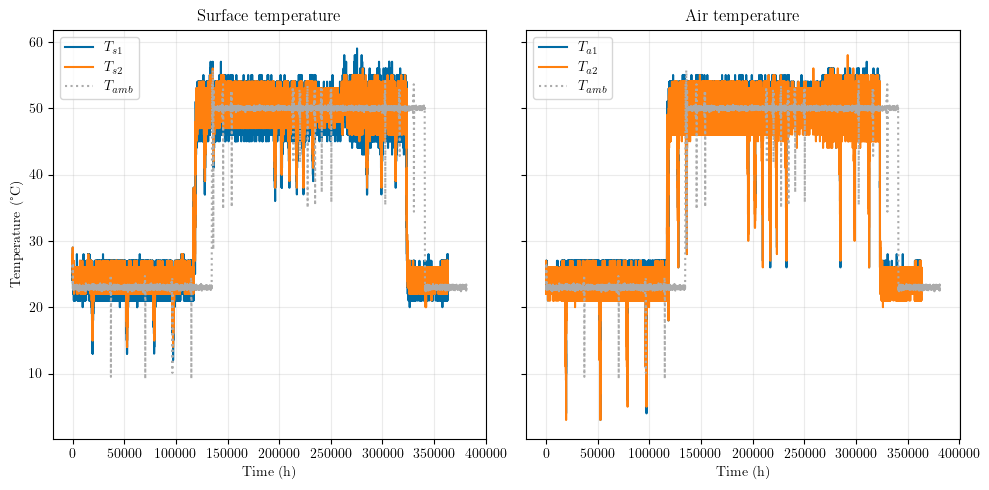

In [247]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

seconds_from_start = sensor_df["unix_time_utc"] - sensor_df["unix_time_utc"][0]

chamber_seconds = np.array([datetime.datetime.strptime(d, "%m/%d/%Y %H:%M:%S") for d in chamber_df["DateTime"]])
chamber_seconds = chamber_seconds - chamber_seconds[0]
chamber_seconds = np.array([delta.total_seconds() for delta in chamber_seconds])

ax1.plot(seconds_from_start / 1, sensor_df["temp_s1"], alpha=1, label="$T_{{s1}}$")
ax1.plot(seconds_from_start / 1, sensor_df["temp_s2"], alpha=1, label="$T_{{s2}}$")
ax1.plot(chamber_seconds / 1, chamber_df["TEMPERATURE PV"], linestyle=":", label="$T_{{amb}}$")
ax2.plot(seconds_from_start / 1, sensor_df["temp_a1"], alpha=1, label="$T_{{a1}}$")
ax2.plot(seconds_from_start / 1, sensor_df["temp_a2"], alpha=1, label="$T_{{a2}}$")
ax2.plot(chamber_seconds / 1, chamber_df["TEMPERATURE PV"], linestyle=":", label="$T_{{amb}}$")

ax1.legend()
ax2.legend()
ax1.grid(alpha=0.25)
ax2.grid(alpha=0.25)

ax1.set_xlabel("Time (h)")
ax2.set_xlabel("Time (h)")
ax1.set_ylabel("Temperature (°C)")

ax1.set_title("Surface temperature")
ax2.set_title("Air temperature")

fig.tight_layout()
plt.show()

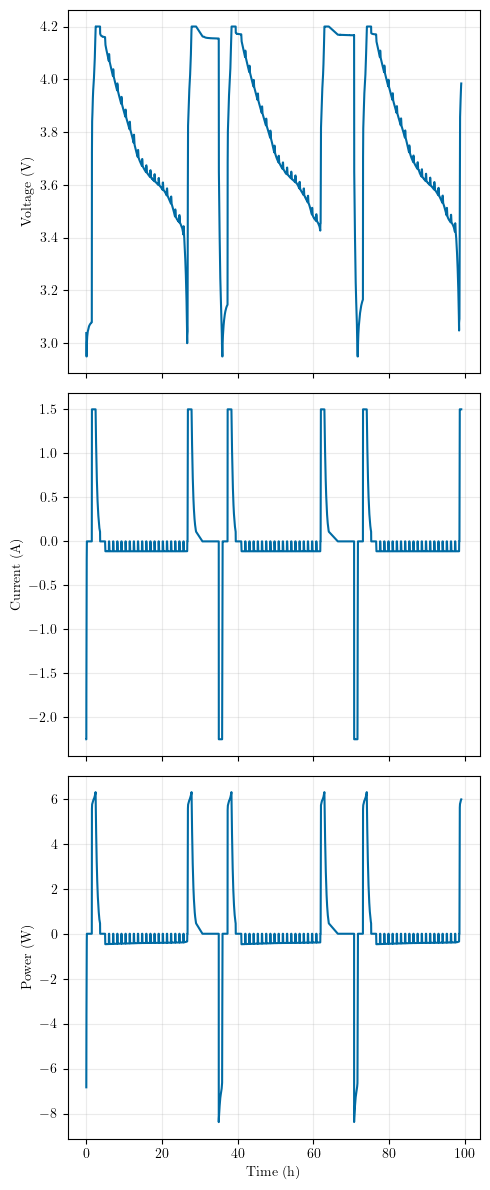

In [133]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 12), sharex=True)

seconds_from_start = np.array([datetime.datetime.strptime(d[:-3], "%m/%d/%Y %H:%M:%S.%f") for d in cap_df["Seconds"]])
seconds_from_start = seconds_from_start - seconds_from_start[0]
seconds_from_start = np.array([delta.total_seconds() for delta in seconds_from_start])

ax1.plot(seconds_from_start / 3600, cap_df["Voltage"], alpha=1)
ax2.plot(seconds_from_start / 3600, cap_df["Current"], alpha=1)
ax3.plot(seconds_from_start / 3600, cap_df["Voltage"] * cap_df["Current"], alpha=1)

ax1.grid(alpha=0.25)
ax2.grid(alpha=0.25)
ax3.grid(alpha=0.25)

ax3.set_xlabel("Time (h)")
ax1.set_ylabel("Voltage (V)")
ax2.set_ylabel("Current (A)")
ax3.set_ylabel("Power (W)")

fig.tight_layout()
plt.show()

In [169]:
np.where(abs(cap_df["Current"] - 0) <= 1e-3)

(array([   415,    416,    417, ..., 300879, 300880, 300881], dtype=int64),)

In [171]:
cap_df["Voltage"][np.where(abs(cap_df["Current"] - 0) <= 1e-3)[0]]

415       2.97781
416       2.97839
417       2.97893
418       2.97944
419       2.97992
           ...   
300877    3.09157
300878    3.09161
300879    3.09165
300880    3.09167
300881    3.09188
Name: Voltage, Length: 73320, dtype: float64

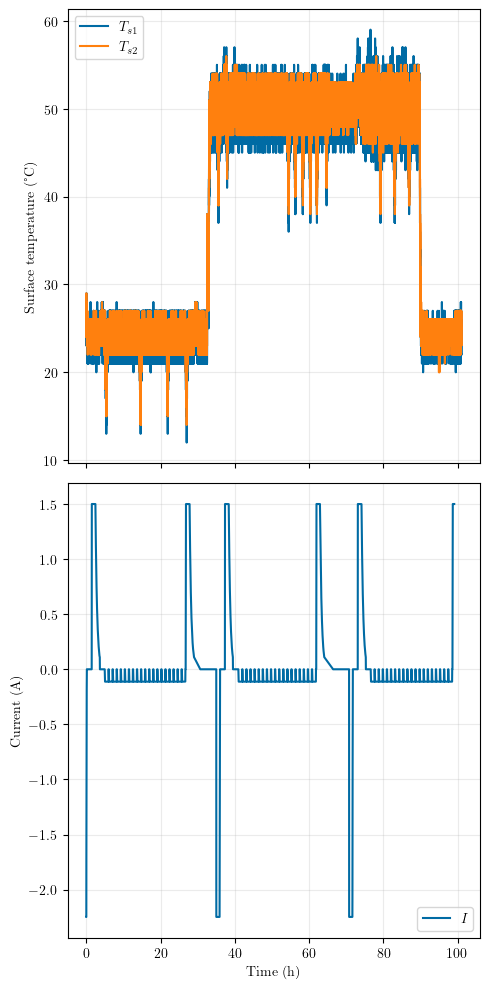

In [163]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 10), sharex=True)

seconds_from_start = sensor_df["unix_time_utc"] - sensor_df["unix_time_utc"][0]
cap_seconds = np.array([datetime.datetime.strptime(d[:-3], "%m/%d/%Y %H:%M:%S.%f") for d in cap_df["Seconds"]])
cap_seconds = cap_seconds - cap_seconds[0]
cap_seconds = np.array([delta.total_seconds() for delta in cap_seconds])


ax1.plot(seconds_from_start / 3600, sensor_df["temp_s1"], alpha=1, label="$T_{{s1}}$")
ax1.plot(seconds_from_start / 3600, sensor_df["temp_s2"], alpha=1, label="$T_{{s2}}$")
ax2.plot(cap_seconds / 3600, cap_df["Current"], alpha=1, label="$I$")

ax1.legend()
ax2.legend()
ax1.grid(alpha=0.25)
ax2.grid(alpha=0.25)

ax2.set_xlabel("Time (h)")
ax1.set_ylabel("Surface temperature (°C)")
ax2.set_ylabel("Current (A)")

fig.tight_layout()
plt.show()

In [ ]:
106272, 212757

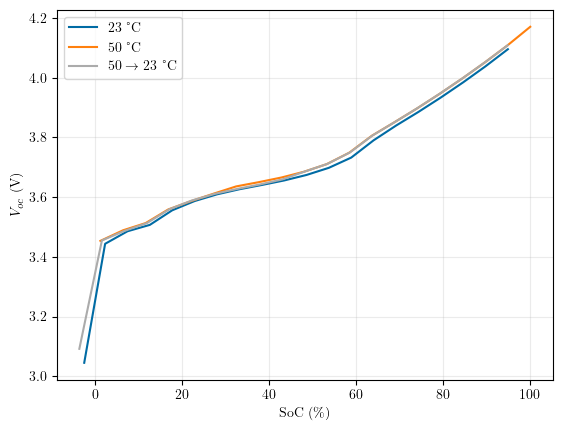

In [246]:
fig, ax = plt.subplots()

# idx = np.where(abs(cap_df["Current"] - 0) <= 1e-3)[0]
# idx = np.where(cap_df["Test_State"] == 6)[0]
idx1 = np.where(cap_df["Test_State"] == 6)[0][np.where(np.where(cap_df["Test_State"] == 6)[0] < 106272)]
idx2 = np.where(cap_df["Test_State"] == 6)[0][np.where((np.where(cap_df["Test_State"] == 6)[0] >= 106272) & (np.where(cap_df["Test_State"] == 6)[0] <= 212757))]
idx3 = np.where(cap_df["Test_State"] == 6)[0][np.where(np.where(cap_df["Test_State"] == 6)[0] > 212757)]

ax.plot(cap_df["SOC"][idx1], cap_df["Voltage"][idx1], label="23 °C")
ax.plot(cap_df["SOC"][idx2], cap_df["Voltage"][idx2], label="50 °C")
ax.plot(cap_df["SOC"][idx3], cap_df["Voltage"][idx3], label="$50\\rightarrow 23$ °C")

ax.legend()

ax.grid(alpha=0.25)

ax.set_xlabel("SoC (\\%)")
ax.set_ylabel("$V_{{oc}}$ (V)")

plt.show()


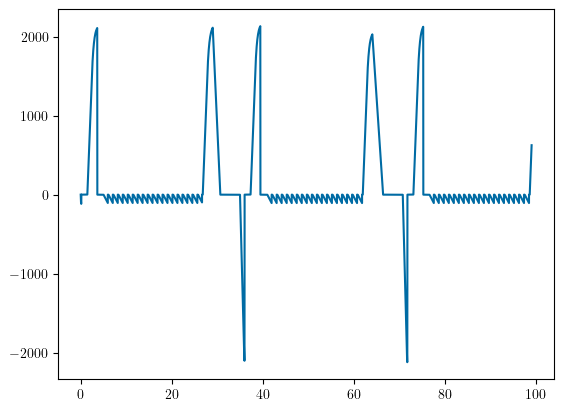

In [159]:
fig, ax = plt.subplots()

seconds_from_start = np.array([datetime.datetime.strptime(d[:-3], "%m/%d/%Y %H:%M:%S.%f") for d in cap_df["Seconds"]])
seconds_from_start = seconds_from_start - seconds_from_start[0]
seconds_from_start = np.array([delta.total_seconds() for delta in seconds_from_start])

ax.plot(seconds_from_start / 3600, cap_df["Cumulative_capacity"])

plt.show()


## Kalman filtering the temperature data
Considering the following variables
$$
\mathbf{x} \triangleq \left(\begin{matrix}
T_{\mathrm{in}} \\
T_{\mathrm{air}} \\
\end{matrix}\right), \mathbf{y} \triangleq \left(\begin{matrix}
T_{\mathrm{s}} \\
T_{\mathrm{air}} \\
\end{matrix}\right), \mathbf{u} \triangleq \left(\begin{matrix}
T_{\mathrm{amb}} \\
q_{\mathrm{gen}} \\
\end{matrix}\right),
$$
then the underlying thermal model for a single cell can be expressed as the following MIMO LTI system
$$
\dot{\mathbf{x}} = \left(\begin{matrix}
-\frac{1}{C_p R_T} & \frac{1}{C_p R_T} \\
\frac{1}{C_{\mathrm{air}} R_T} & -\frac{R_{\mathrm{air}} + R_T}{C_{\mathrm{air}} R_{\mathrm{air}} R_T} \\
\end{matrix}\right)\mathbf{x} + \left(\begin{matrix}
\frac{1}{C_{\mathrm{air}} R_{\mathrm{air}}} & 0 \\
0 & \frac{1}{C_p} \\
\end{matrix}\right)\mathbf{u} \\
\mathbf{y} = \left(\begin{matrix}
\frac{R_{\mathrm{out}}}{R_T} & -\frac{R_{\mathrm{out}}}{R_T} \\
0 & 1 \\
\end{matrix}\right)\mathbf{x},
$$
where $R_{T} \triangleq R_{\mathrm{in}} + R_{\mathrm{out}}$.

In [135]:
sensor_df

,timestamp_utc,unix_time_utc,cell,res_s1,temp_s1,res_s2,temp_s2,res_a1,temp_a1,res_a2,temp_a2
0,2024-01-19 17:58:57.126194+00:00,1705687137,0,93750.01,26,90148.70,27,94857.14,26,98255.82,25
1,2024-01-19 17:58:58.169661+00:00,1705687138,0,99415.21,25,90148.70,27,95229.02,26,99027.25,25
2,2024-01-19 17:58:59.214335+00:00,1705687139,0,92293.24,27,89795.93,27,100982.32,25,98640.77,25
3,2024-01-19 17:59:00.259535+00:00,1705687140,0,92293.24,27,88397.80,28,95602.30,26,99027.25,25
4,2024-01-19 17:59:01.305118+00:00,1705687141,0,92655.38,27,89795.93,27,99804.69,25,94117.65,26
...,...,...,...,...,...,...,...,...,...,...,...
347665,2024-01-23 22:54:46.895912+00:00,1706050486,0,101377.96,25,99027.25,25,105010.03,24,113569.93,22
347666,2024-01-23 22:54:47.941299+00:00,1706050487,0,103379.72,24,99415.21,25,104600.00,24,105010.03,24
347667,2024-01-23 22:54:48.986086+00:00,1706050488,0,103379.72,24,100195.70,25,105010.03,24,107926.82,23
347668,2024-01-23 22:54:50.030603+00:00,1706050490,0,100982.32,25,101377.96,25,105010.03,24,108775.50,23


In [ ]:
#
surface_temp = 0.5 * sensor_df["temp_s1"] + 0.5 * sensor_df["temp_s2"]
air_temp = 0.5 * sensor_df["temp_a1"] + 0.5 * sensor_df["temp_a2"]

currents = cap_df["Current"]